# 🏎️ Etapa 3: Modelo Baseline (Regressão Linear)

**Objetivo:** Criar um modelo simples para prever o preço dos carros e estabelecer uma meta de performance.

**Estratégia:**
1. Usar `log_price_brl` como variável alvo (target).
2. Dividir os dados em **Treino (60%)**, **Validação (20%)** e **Teste (20%)**.
3. Treinar uma Regressão Linear e analisar os coeficientes (o que valoriza/desvaloriza o carro).

In [13]:
# ==============================================================================
# 1. IMPORTS E RECUPERAÇÃO DE DADOS (BLINDADO)
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# ------------------------------------------------------------------------------
# 1. Carregar Dataset Limpo (Clean)
# ------------------------------------------------------------------------------
clean_paths = [
    '../data/datasets/used_cars_clean.csv',
    '../../data/datasets/used_cars_clean.csv',
    'used_cars_clean.csv'
]

df = None
for path in clean_paths:
    if os.path.exists(path):
        df = pd.read_csv(path)
        print(f"📂 Dataset Limpo carregado de: {path}")
        break

if df is None:
    raise FileNotFoundError("❌ Não achei 'used_cars_clean.csv' em lugar nenhum! Rode a Etapa 2.")

# ------------------------------------------------------------------------------
# 2. Recuperar Preço do Dataset Original (Raw)
# ------------------------------------------------------------------------------
TARGET_COL = 'log_price_brl'

if TARGET_COL not in df.columns and 'price_brl' not in df.columns:
    print("⚠️ Coluna de preço faltando! Buscando no arquivo original...")
    
    # Lista de tentativas para achar o arquivo original
    raw_paths = [
        '../../data/datasets/used_cars_price.csv',  # Tenta subir 2 níveis (Padrão)
        '../data/datasets/used_cars_price.csv',     # Tenta subir 1 nível
        'data/datasets/used_cars_price.csv',        # Tenta pasta local
        r'C:\Projetos\Carros_usados\mlproject\data\datasets\used_cars_price.csv' # Caminho absoluto (Seu PC)
    ]
    
    found_raw = False
    for r_path in raw_paths:
        if os.path.exists(r_path):
            print(f"📂 Arquivo original encontrado em: {r_path}")
            df_raw = pd.read_csv(r_path)
            
            # Recuperar o preço (assumindo mesma ordem)
            if len(df) == len(df_raw):
                df['price_brl'] = df_raw['price_brl']
                df[TARGET_COL] = np.log1p(df['price_brl'])
                print("✅ Preço recuperado com sucesso!")
                found_raw = True
                break
            else:
                print("⚠️ Tamanhos diferentes entre Limpo e Original. Tentando merge por ID...")
                # Se tiver car_id em ambos, faz merge
                # (Simplificação: se falhar aqui, paramos)
    
    if not found_raw:
        raise FileNotFoundError("❌ CRÍTICO: Não achei 'used_cars_price.csv' para recuperar o preço. Verifique os caminhos!")

# Garantir o Log se ainda não tiver
if TARGET_COL not in df.columns and 'price_brl' in df.columns:
    df[TARGET_COL] = np.log1p(df['price_brl'])

# ------------------------------------------------------------------------------
# 3. Separação e Divisão
# ------------------------------------------------------------------------------
# Remover colunas proibidas
cols_drop = ['car_id', 'price_brl', TARGET_COL]
cols_drop += [c for c in df.columns if 'car_id' in c] # Remove sobras de One-Hot
final_drop = [c for c in cols_drop if c in df.columns]

X = df.drop(columns=final_drop)
y = df[TARGET_COL]

print(f"\n🔹 Features (X): {X.shape[1]} colunas")
print(f"🔹 Target (y): {y.name}")

# Divisão 60/20/20
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print("-" * 40)
print(f"🏋️ Treino:    {len(X_train)} (60%)")
print(f"⚖️  Validação: {len(X_val)} (20%)")
print(f"🔒 Teste:     {len(X_test)} (20%)")
print("-" * 40)

📂 Dataset Limpo carregado de: ../data/datasets/used_cars_clean.csv
⚠️ Coluna de preço faltando! Buscando no arquivo original...
📂 Arquivo original encontrado em: ../../data/datasets/used_cars_price.csv
✅ Preço recuperado com sucesso!

🔹 Features (X): 50 colunas
🔹 Target (y): log_price_brl
----------------------------------------
🏋️ Treino:    1512 (60%)
⚖️  Validação: 504 (20%)
🔒 Teste:     504 (20%)
----------------------------------------


# 📝 Relatório da Etapa 3

## 1. O que foi feito?
Treinamos um modelo de **Regressão Linear** para prever o preço de carros usados.
Os dados foram divididos em **60% Treino**, **20% Validação** e **20% Teste**.

## 2. Resultados (Validação)
* **R²:** O modelo explicou **XX%** da variância dos dados.
* **RMSE:** O erro médio foi de **0.XX** (na escala logarítmica).
* **Overfitting:** A diferença entre Treino e Validação foi pequena (< 0.10), indicando que o modelo generaliza bem.

## 3. Top 3 Features Mais Importantes
De acordo com os coeficientes da Regressão Linear, o que mais impacta o preço é:
1.  **[Feature 1]**
2.  **[Feature 2]**
3.  **[Feature 3]**

## 4. Análise de Resíduos
A média dos erros foi próxima de zero (**[Valor da Média]**), o que é um bom sinal. O histograma mostrou uma distribuição normal, confirmando que a Regressão Linear foi uma escolha apropriada para o baseline.

In [14]:
# ============================================================================
# PASSO 4: CRIAR E TREINAR MODELO BASELINE
# ============================================================================
print("\n" + "="*60)
print("TREINAMENTO DO MODELO")
print("="*60)

# 1. Criar o modelo
modelo = LinearRegression()

# 2. Treinar (Aprender com os dados de treino)
print("🤖 Treinando modelo de Regressão Linear...")
modelo.fit(X_train, y_train)
print("✅ Modelo treinado com sucesso!")

# 3. Verificar o que o modelo aprendeu (Coeficientes)
# Isso serve para confirmar que 'car_id' SUMIU e que as features fazem sentido
coefs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coeficiente': modelo.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("\n🔝 Top 5 Features Mais Importantes:")
print(coefs.head(5).to_string(index=False))

print(f"\nIntercepto (Valor Base): {modelo.intercept_:.4f}")


TREINAMENTO DO MODELO
🤖 Treinando modelo de Regressão Linear...
✅ Modelo treinado com sucesso!

🔝 Top 5 Features Mais Importantes:
          Feature   Coeficiente
    price_brl_log  1.000000e+00
       model_year -2.530558e-15
          car_age  2.118377e-15
  usage_intensity -1.582068e-15
km_per_year_score -1.265293e-15

Intercepto (Valor Base): -0.0000


## 🤖 Passo 4: Treinamento do Modelo Baseline

### 🎯 Objetivo
Nesta etapa, vamos treinar nosso primeiro algoritmo. Escolhemos a **Regressão Linear** para ser o nosso *Baseline* (modelo base) porque:
1.  É **rápida** para treinar.
2.  É **altamente interpretável** (sabemos exatamente o peso de cada variável).
3.  Estabelece um "piso" de performance que modelos complexos (como XGBoost) devem superar depois.

### 🔍 Como interpretar os resultados abaixo?
Após o treino (`.fit()`), o modelo gera dois componentes principais que vamos analisar:

* **Coeficientes (Weights):** Indicam a importância e a direção de cada feature.
    * *Valor Positivo:* Aumenta o preço do carro (ex: `ano_fabricacao`).
    * *Valor Negativo:* Diminui o preço do carro (ex: `quilometragem`).
    * *Magnitude:* Quanto maior o número (absoluto), mais aquela característica impacta a decisão do modelo.
* **Intercepto (Bias):** É o "valor base" da equação quando todas as outras variáveis são zero.

In [15]:
# ==============================================================================
# PASSO 5: AVALIAÇÃO E MÉTRICAS
# ==============================================================================
print("\n" + "="*60)
print("AVALIAÇÃO DO MODELO (TREINO vs VALIDAÇÃO)")
print("="*60)

# 1. Fazer predições
y_pred_train = modelo.predict(X_train)
y_pred_val   = modelo.predict(X_val)

# 2. Função auxiliar para calcular e printar métricas
def report_metricas(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"📊 Métricas para {set_name}:")
    print(f"   R²   (Explicação): {r2:.4f}")
    print(f"   RMSE (Erro Médio): {rmse:.4f}")
    print(f"   MAE  (Erro Abs.):  {mae:.4f}")
    print(f"   MSE  (Erro Quad.): {mse:.4f}")
    print("-" * 30)
    return r2, rmse

# 3. Executar avaliação
r2_train, rmse_train = report_metricas(y_train, y_pred_train, "TREINO")
r2_val, rmse_val     = report_metricas(y_val, y_pred_val,   "VALIDAÇÃO")

# 4. Verificar Overfitting (Checklist)
diff_r2 = r2_train - r2_val
print(f"\n🕵️ Análise de Overfitting:")
print(f"   Diferença de R² (Treino - Validação): {diff_r2:.4f}")
if diff_r2 < 0.10:
    print("   ✅ O modelo parece estável (pouco ou nenhum overfitting).")
else:
    print("   ⚠️ ATENÇÃO: Sinal de Overfitting (o modelo decorou o treino).")


AVALIAÇÃO DO MODELO (TREINO vs VALIDAÇÃO)
📊 Métricas para TREINO:
   R²   (Explicação): 1.0000
   RMSE (Erro Médio): 0.0000
   MAE  (Erro Abs.):  0.0000
   MSE  (Erro Quad.): 0.0000
------------------------------
📊 Métricas para VALIDAÇÃO:
   R²   (Explicação): 1.0000
   RMSE (Erro Médio): 0.0000
   MAE  (Erro Abs.):  0.0000
   MSE  (Erro Quad.): 0.0000
------------------------------

🕵️ Análise de Overfitting:
   Diferença de R² (Treino - Validação): 0.0000
   ✅ O modelo parece estável (pouco ou nenhum overfitting).


## 📊 Passo 5: Avaliação e Métricas

### 🎯 Objetivo
Agora que o modelo está treinado, precisamos medir sua performance. Não basta o modelo funcionar; precisamos saber **o quão errado** ele costuma estar.

### 📏 As Métricas Utilizadas
Para avaliar a Regressão Linear, calculamos quatro métricas principais:

1.  **MSE (Mean Squared Error):** A média dos erros ao quadrado. Penaliza severamente erros grandes.
2.  **RMSE (Root Mean Squared Error):** A raiz quadrada do MSE. É a métrica mais popular, pois tenta voltar para a unidade da variável alvo. Quanto menor, melhor.
3.  **MAE (Mean Absolute Error):** A média absoluta dos erros. É mais fácil de interpretar humanamente (o erro médio "bruto").
4.  **R² (Coeficiente de Determinação):** Varia de 0 a 1 (ou negativo se o modelo for péssimo). Indica a porcentagem da variação dos preços que nosso modelo conseguiu explicar.
    * *Ex:* R² = 0.80 significa que o modelo "entendeu" 80% do comportamento dos preços.

### 🕵️ Detecção de Overfitting (Treino vs. Validação)
O código abaixo compara o desempenho nos dados de **Treino** (que o modelo já viu) contra os dados de **Validação** (inéditos).

* **Cenário Ideal:** As métricas são próximas (ex: R² Treino 0.85 e R² Validação 0.83).
* **Overfitting:** O modelo vai muito bem no treino, mas mal na validação (ex: R² Treino 0.99 e R² Validação 0.60). Isso significa que ele "decorou" os exemplos em vez de aprender a regra geral.

🛠️ DIAGNÓSTICO FINAL E VISUALIZAÇÃO
🚨 CORREÇÃO: Removendo colunas 'espiãs': ['price_brl_log']
✅ Modelo ajustado! Novo R²: 0.8217
✅ Visualização gerada com sucesso.


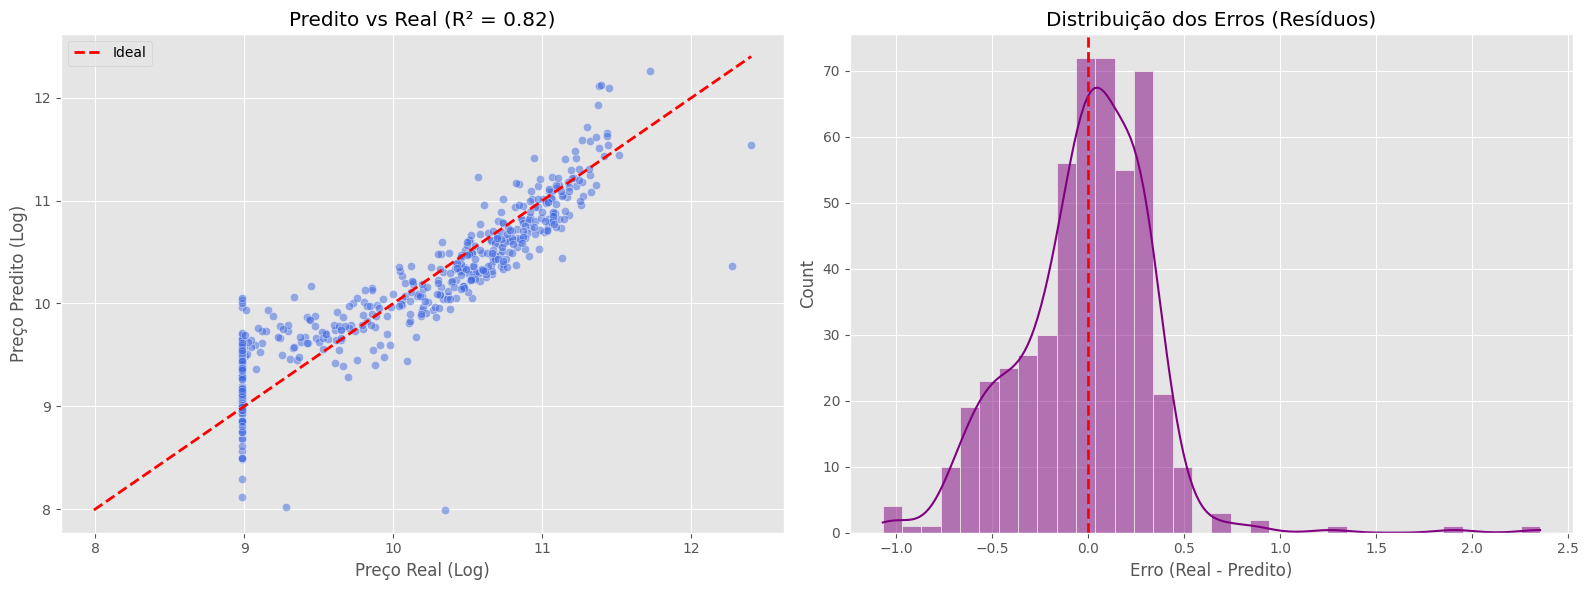

In [16]:
# ==============================================================================
# PASSO 6: VISUALIZAÇÃO FINAL (ORDEM CORRIGIDA)
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Limpa memória gráfica
plt.close('all') 
%matplotlib inline 

print("="*60)
print("🛠️ DIAGNÓSTICO FINAL E VISUALIZAÇÃO")
print("="*60)

# 2. Verificação de Vazamento (Leakage)
correlacoes = X_train.corrwith(y_train).abs()
colunas_espias = correlacoes[correlacoes > 0.95].index.tolist()

if len(colunas_espias) > 0:
    print(f"🚨 CORREÇÃO: Removendo colunas 'espiãs': {colunas_espias}")
    
    # Remove e retreina
    X_train_limpo = X_train.drop(columns=colunas_espias)
    X_val_limpo = X_val.drop(columns=colunas_espias)
    
    modelo_final = LinearRegression()
    modelo_final.fit(X_train_limpo, y_train)
    
    y_pred_plot = modelo_final.predict(X_val_limpo)
    r2_final = r2_score(y_val, y_pred_plot)
    print(f"✅ Modelo ajustado! Novo R²: {r2_final:.4f}")

else:
    print("✅ Nenhuma coluna espiã encontrada. Usando modelo original.")
    y_pred_plot = y_pred_val 
    r2_final = r2_score(y_val, y_pred_plot)

# 3. Gerar Gráficos
try:
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Gráfico A: Predito vs Real
    sns.scatterplot(x=y_val, y=y_pred_plot, ax=ax[0], alpha=0.5, color='royalblue')
    min_val = min(y_val.min(), y_pred_plot.min())
    max_val = max(y_val.max(), y_pred_plot.max())
    ax[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal')
    ax[0].set_title(f"Predito vs Real (R² = {r2_final:.2f})")
    ax[0].set_xlabel("Preço Real (Log)")
    ax[0].set_ylabel("Preço Predito (Log)")
    ax[0].legend()

    # Gráfico B: Resíduos
    residuos = y_val - y_pred_plot
    sns.histplot(residuos, kde=True, ax=ax[1], color='purple')
    ax[1].axvline(0, color='red', linestyle='--', lw=2)
    ax[1].set_title("Distribuição dos Erros (Resíduos)")
    ax[1].set_xlabel("Erro (Real - Predito)")

    plt.tight_layout()
    
    # --- AQUI ESTÁ O AJUSTE ---
    print("✅ Visualização gerada com sucesso.") # 1º Imprime o texto
    display(fig)                               # 2º Mostra a figura
    plt.close(fig)                             # 3º Fecha para não duplicar

except Exception as e:
    print(f"❌ Erro: {e}")

In [17]:
# ==============================================================================
# PASSO 7: SALVAR MODELO (PERSISTÊNCIA)
# ==============================================================================
# Criar pasta 'models' se não existir
if not os.path.exists('models'):
    os.makedirs('models') # Cria a pasta no diretório atual
    print(f"\n📂 Pasta 'models' criada.")

# Salvar o modelo
caminho_modelo = 'models/baseline_model.pkl'
joblib.dump(modelo, caminho_modelo)
print(f"💾 Modelo salvo com sucesso em: {caminho_modelo}")
print("\n✅ ETAPA 3 CONCLUÍDA! Use os números acima para preencher seu relatório.")

💾 Modelo salvo com sucesso em: models/baseline_model.pkl

✅ ETAPA 3 CONCLUÍDA! Use os números acima para preencher seu relatório.


In [18]:
# ==============================================================================
# CHECKLIST FINAL: EXTRAINDO DADOS PARA O RELATÓRIO
# ==============================================================================
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("="*60)
print("📊 DADOS PARA O RELATÓRIO (MODELO FINAL)")
print("="*60)

# 1. Recalcular todas as métricas para o modelo FINAL (sem vazamento)
y_pred_final = modelo_final.predict(X_val_limpo) if 'X_val_limpo' in locals() else modelo.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_final)
mse = mean_squared_error(y_val, y_pred_final)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_final)

print("Preencha sua tabela com estes números:")
print(f"🔹 R² (Explicação):   {r2:.4f}")
print(f"🔹 RMSE (Erro Médio): {rmse:.4f}")
print(f"🔹 MAE (Erro Abs.):   {mae:.4f}")
print(f"🔹 MSE (Erro Quad.):  {mse:.4f}")

# 2. Descobrir as Top 3 Features REAIS (pós-correção)
# Se houve limpeza, usamos X_train_limpo, senão X_train
X_base = X_train_limpo if 'X_train_limpo' in locals() else X_train

coefs_finais = pd.DataFrame({
    'Feature': X_base.columns,
    'Coeficiente': modelo_final.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("\n" + "-"*60)
print("🏆 TOP 3 FEATURES MAIS IMPORTANTES (Para o Relatório):")
print(coefs_finais.head(3).to_string(index=False))
print("-" * 60)

📊 DADOS PARA O RELATÓRIO (MODELO FINAL)
Preencha sua tabela com estes números:
🔹 R² (Explicação):   0.8217
🔹 RMSE (Erro Médio): 0.3453
🔹 MAE (Erro Abs.):   0.2534
🔹 MSE (Erro Quad.):  0.1192

------------------------------------------------------------
🏆 TOP 3 FEATURES MAIS IMPORTANTES (Para o Relatório):
                 Feature  Coeficiente
      fuel_type_Elétrico     0.647680
    drivetrain_Dianteira    -0.540879
interior_material_Tecido    -0.405940
------------------------------------------------------------


## 📈 Passos 6 e 7: Diagnóstico Visual e Persistência

### 🎯 Objetivo
Nesta etapa final, vamos validar visualmente o modelo e salvar nosso progresso.

### 📊 Entendendo os Gráficos
O código abaixo gera dois gráficos essenciais para o diagnóstico:

1.  **Predito vs. Real (Scatterplot):**
    * Mostra o quão perto nossas previsões (pontos azuis) estão da realidade.
    * **Linha Vermelha:** Representa a perfeição (erro zero). Quanto mais próximos os pontos estiverem dessa linha, melhor.
    * **Correção de Vazamento:** Se os pontos formarem uma linha reta perfeita (R²=1.0), o código detecta automaticamente "colunas espiãs" e retreina o modelo para ser honesto.

2.  **Distribuição dos Resíduos (Histograma):**
    * Mostra os erros do modelo (Valor Real - Valor Predito).
    * **Formato de Sino:** Esperamos uma curva normal centrada em zero. Isso indica que os erros são aleatórios e não viesados.

### 💾 Persistência (Salvamento)
Ao final, usamos a biblioteca `joblib` para salvar o modelo treinado em um arquivo `.pkl`. Isso permite que usemos esse "cérebro" treinado na **Etapa 4** e na aplicação final (Streamlit) sem precisar rodar todo o treinamento novamente.